In [ ]:
import tensorflow as tf
print("TensorFlow 버전:", tf.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))


TensorFlow 버전: 2.10.0
GPU: []


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [4]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


cifar10.load_data():
CIFAR-10 데이터셋 업로드.
x_train과 x_test의 reshape()형상 변환:
CIFAR-10 데이터셋의 이미지는 32x32 크기이며, 채널 수는 RGB 이미지 3.
(훈련 데이터 수, 32, 32, 3)과 (테스트 데이터 수, 32, 32, 3)의 형태로 출력.
-1은 해당위치에서 자동으로 4차원 데이터 생성 옵션.
데이터셋 정규화:
x_train과 x_test의 값을 0과 1 사이의 범위로 정규화

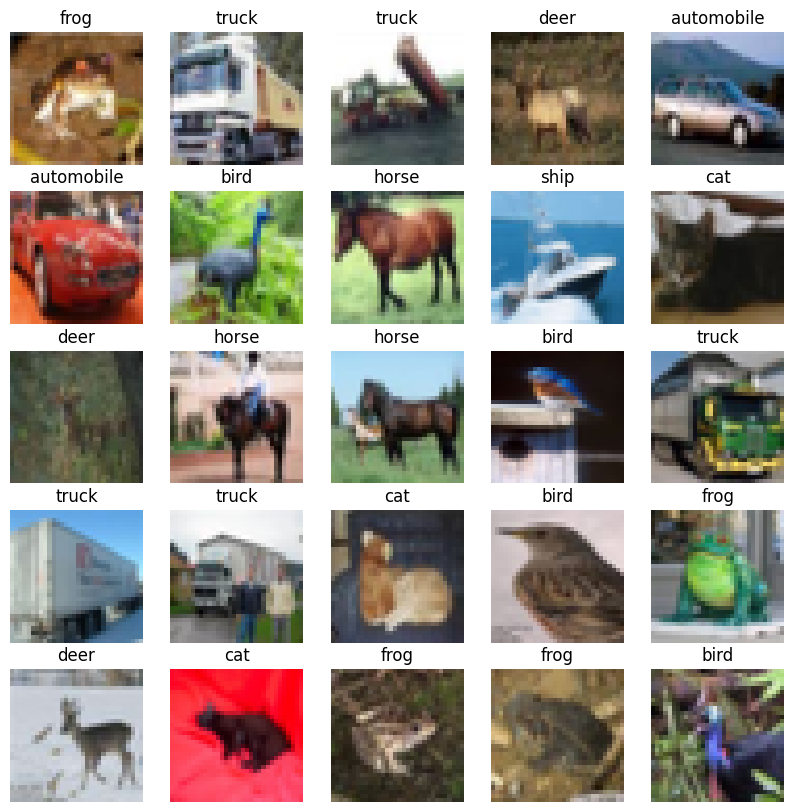

In [6]:
import matplotlib.pyplot as plt

# 클래스 레이블 매핑
class_names = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# 샘플 데이터 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [9]:
c_model = Sequential()

c_model.add(Conv2D(input_shape=(32,32,3),kernel_size=(3,3),
                   filters=32,activation='relu'))
c_model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
c_model.add(MaxPool2D(pool_size=(2,2)))
c_model.add(Dropout(0.25))

c_model.add(Flatten())

c_model.add(Dense(128,activation='relu'))
c_model.add(Dropout(0.5))
c_model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sequential 모델 생성: c_model = Sequential()
Conv2D 레이어 추가: c_model.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
 filters=32, activation='relu’))
input_shape는 입력 데이터의 형태, (32, 32, 3)
kernel_size는 필터(커널)의 크기, (3, 3)
filters는 필터의 개수, 32개
activation은 활성화 함수, 'relu’
Conv2D 레이어 추가: c_model.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu’))
이전 레이어와 동일한 커널 크기와 활성화 함수, 필터의 개수는 64개.
MaxPooling2D 레이어 추가: c_model.add(MaxPool2D(pool_size=(2,2)))
pool_size는 풀링의 크기로, (2, 2)로 설정.
Dropout 레이어 : c_model.add(Dropout(0.25)), 과적합을 방지하기 위해 일부 뉴런을
랜덤하게 비활성화.
Flatten 레이어 추가: c_model.add(Flatten()), 다차원의 데이터를 1차원으로 변환
Dense 레이어 추가: c_model.add(Dense(128, activation='relu’)) 뉴런 128개
활성화 함수로는 'relu’
Dropout 레이어 추가: c_model.add(Dropout(0.5)), 50%의 뉴런을 비활성화
마지막 Dense 레이어 추가: c_model.add(Dense(10, activation='softmax’))
뉴런의 개수는 10개로 설정, 활성화 함수로는 'softmax'

In [11]:
c_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

c_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

1.출력 형태 계산:
1) Convolutional 레이어:
1) 출력 높이 = (입력 높이 - 커널 높이 + 2 * 패딩) / 스트라이드 + 1
2) 출력 너비 = (입력 너비 - 커널 너비 + 2 * 패딩) / 스트라이드 + 1
2) MaxPooling 레이어:
1) 출력 높이 = 입력 높이 / 풀링 윈도우 높이
2) 출력 너비 = 입력 너비 / 풀링 윈도우 너비
3) Flatten 레이어: 출력 형태는 (None, n). 여기서 n은 이전 레이어의 출력의 요소 수.
4) Dense 레이어: 입력 형태에 따라 출력 형태가 결정.
2.파라미터 수 계산:
1) Convolutional 레이어: (커널 높이 * 커널 너비 * 입력 채널 수 + 1) * 필터 수
2) Dense 레이어: (이전 레이어의 출력 크기 + 1) * 현재 레이어의 뉴런 수

conv2d (Conv2D) 레이어:(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu’)
 입력 형태: (None, 32, 32, 3)
출력 형태: (None, 30, 30, 32), 30 = (32 – 3+2*0)/1+1
파라미터 수: (3 * 3 * 3 + 1) * 32 = 896
conv2d_1 (Conv2D) 레이어: (kernel_size=(3,3), filters=64, activation='relu’)
 입력 형태: (None, 30, 30, 32)
출력 형태: (None, 28, 28, 64), 28 =(30 – 3 +2*0)/1+1
파라미터 수: (3 * 3 * 32 + 1) * 64 = 18,496
max_pooling2d (MaxPooling2D) 레이어:
 입력 형태: (None, 28, 28, 64)
출력 형태: (None, 14, 14, 64), 14 = 28/2
파라미터 수: 0 (풀링 레이어는 학습 가능한 파라미터가 없음)
dropout (Dropout) 레이어:
 입력 형태: (None, 14, 14, 64)
출력 형태: (None, 14, 14, 64)
파라미터 수: 0 (드롭아웃 레이어는 학습 가능한 파라미터가 없음)

conv2d (Conv2D) 레이어:(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu’)
 입력 형태: (None, 32, 32, 3)
출력 형태: (None, 30, 30, 32), 30 = (32 – 3+2*0)/1+1
파라미터 수: (3 * 3 * 3 + 1) * 32 = 896
conv2d_1 (Conv2D) 레이어: (kernel_size=(3,3), filters=64, activation='relu’)
 입력 형태: (None, 30, 30, 32)
출력 형태: (None, 28, 28, 64), 28 =(30 – 3 +2*0)/1+1
파라미터 수: (3 * 3 * 32 + 1) * 64 = 18,496
max_pooling2d (MaxPooling2D) 레이어:
 입력 형태: (None, 28, 28, 64)
출력 형태: (None, 14, 14, 64), 14 = 28/2
파라미터 수: 0 (풀링 레이어는 학습 가능한 파라미터가 없음)
dropout (Dropout) 레이어:
 입력 형태: (None, 14, 14, 64)
출력 형태: (None, 14, 14, 64)
파라미터 수: 0 (드롭아웃 레이어는 학습 가능한 파라미터가 없음)

In [12]:
c_history = c_model.fit(x_train,y_train,batch_size=128,
                        epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3205 - loss: 1.8713 - val_accuracy: 0.5742 - val_loss: 1.2404
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5357 - loss: 1.3109 - val_accuracy: 0.6420 - val_loss: 1.0480
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5955 - loss: 1.1441 - val_accuracy: 0.6512 - val_loss: 0.9972
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6287 - loss: 1.0485 - val_accuracy: 0.6747 - val_loss: 0.9475
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6472 - loss: 0.9849 - val_accuracy: 0.6801 - val_loss: 0.9277
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6691 - loss: 0.9326 - val_accuracy: 0.6912 - val_loss: 0.8933
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6894 - loss: 0.8805 - val_accuracy: 0.6980 - val_loss: 0.8670
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7063 - loss: 0.8306 - val_accurac

In [13]:
c_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7155 - loss: 0.9617


[0.9703810811042786, 0.7156000137329102]

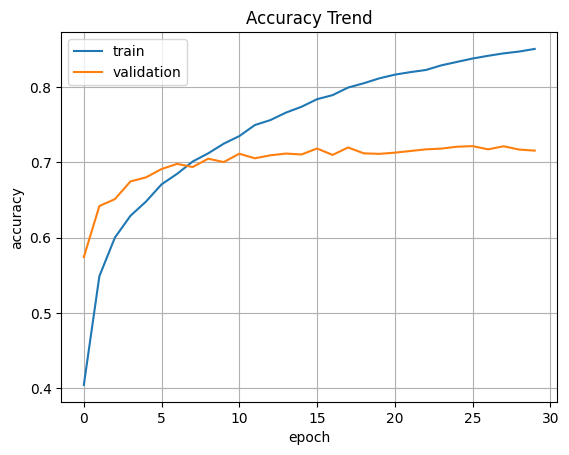

In [15]:
import matplotlib.pyplot as plt
plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

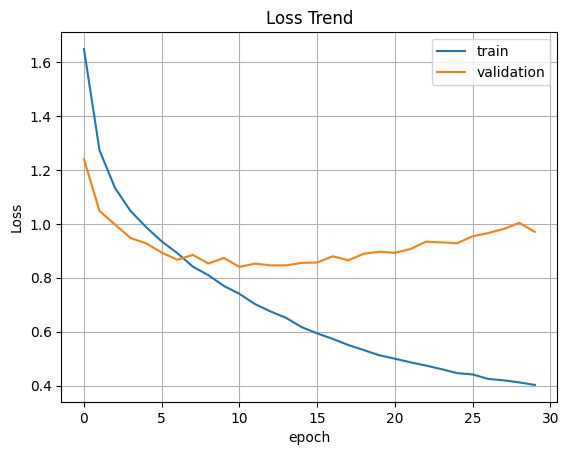

In [16]:
import matplotlib.pyplot as plt
plt.plot(c_history.history['loss'])
plt.plot(c_history.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

모델은 훈련 데이터에 잘 적합되었지만,
검증 데이터에 대한 일반화 성능이 한계에 다다른 것으로 보임.
Epoch 10 근처에서 Early Stopping 했으면 더 나은 일반화 성능을 얻을 수 있었을 가능성 있음
EarlyStopping 콜백 추가→ 검증 손실이 더 이상 감소하지 않을 때 학습 조기 종료
Dropout 비율 증가 또는 L2 정규화→ 모델 복잡도 제어로 과적합 방지
데이터 증강→ 더 다양한 학습 패턴 제공으로 일반화 능력 향상
에포크 수 줄이기→ 현재 30 에포크는 과적합을 심화시키고 있음

In [46]:
# 과적합 방지 시도
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.35))

# Block 3
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

# Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
c_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

c_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,826 (6.21 MB)

 Trainable params: 1,626,634 (6.21 MB)

 Non-trainable params: 192 (768.00 B)

In [48]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)
c_history = c_model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7647 - loss: 0.6617 - val_accuracy: 0.6427 - val_loss: 1.0884
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7839 - loss: 0.6051 - val_accuracy: 0.6972 - val_loss: 0.9224
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7966 - loss: 0.5690 - val_accuracy: 0.6564 - val_loss: 1.0252
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8134 - loss: 0.5278 - val_accuracy: 0.6903 - val_loss: 1.0537
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8225 - loss: 0.5024 - val_accuracy: 0.7016 - val_loss: 0.9648


In [50]:
c_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6998 - loss: 0.9084


[0.9224311709403992, 0.6972000002861023]

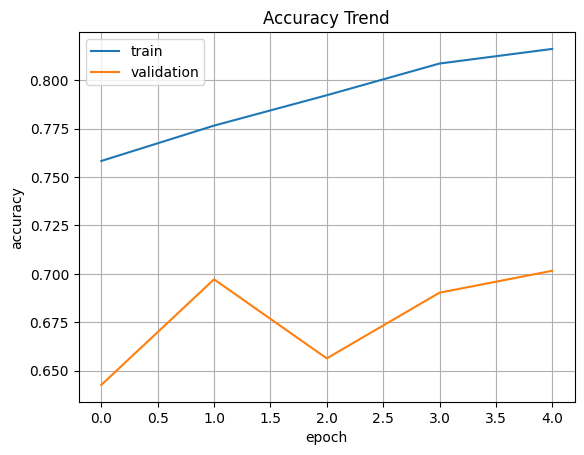

In [51]:
import matplotlib.pyplot as plt
plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

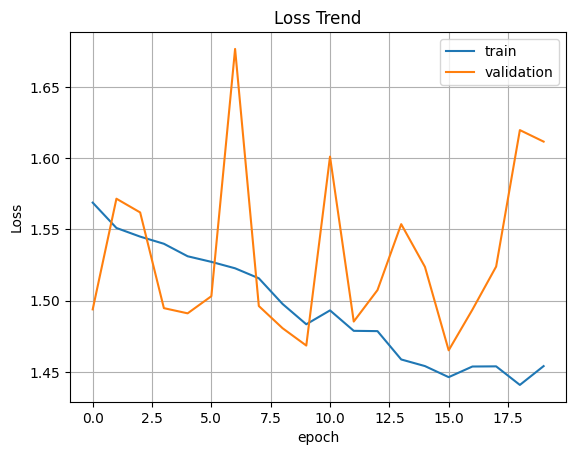

In [32]:
import matplotlib.pyplot as plt
plt.plot(c_history.history['loss'])
plt.plot(c_history.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

# 데이터 증강


CNN의 성능을 향상시키는 방법
1.데이터 증강 (Data Augmentation): 데이터 증강은 원본 데이터셋을 변형하여 새로운 데이터를
생성하는 기법. 이미지 회전, 확대/축소, 이동, 뒤집기 등의 변형을 적용. 과적합을 방지
2.전이 학습 (Transfer Learning): 대규모 데이터셋에서 사전 훈련된 모델의 특징 추출 능력 활용
3.하이퍼파라미터 조정 : 그리드 탐색(Grid Search), 랜덤 탐색(Random Search).
4.정규화 (Regularization): 드롭아웃(Dropout)과 같은 기법을 사용하여 일부 뉴런을 무작위로 비활성화.
5.앙상블 학습 (Ensemble Learning): 여러 개의 CNN 모델을 독립적으로 훈련하고, 이들의 예측을
평균 또는 다수결 등의 방법으로 결합

ImageDataGenerator :이미지 데이터의 증강 설정을 정의.
 rotation_range 이미지 회전 범위,
 shear_range 이미지를 기울이거나 비틀어지게 만드는 변환,
 이미지의 픽셀을 수평 또는 수직 방향으로 이동, 0부터 1 사이
 width_shift_range 가로 이동 범위,
 height_shift_range 세로 이동 범위,
 horizontal_flip 수평 뒤집기

en = ImageDataGenerator(rotation_range=20,
 shear_range=0.2,
 width_shift_range=0.2,
height_shift_range=0.2,
 horizontal_flip=True)
rotation_range=20 : 이미지를 +20도까지 무작위로 회전.
shear_range=0.2 : +20%까지 무작위로 변형.
width_shift_range=0.2 : 이미지를 +20%까지 무작위로 가로로 이동.
height_shift_range=0.2 : 이미지를 +20%까지 무작위로 세로로 이동
horizontal_flip=True : 수평으로 뒤집을 수 있음

if augment_size >= x_train.shape[0]:
augment_size = x_train.shape[0] - 1
 # 데이터 증강 사이즈(augment_size)가 학습 데이터의 개수(x_train.shape[0])와
같거나 크다면, 증강할 이미지를 기존 이미지에서 선택시
중복된 이미지가 생성될 수 있다 => 49,999(인덱스를 고려시 50,000 이 아닌!!)
randi = np.random.choice(x_train.shape[0], size=augment_size, replace=False)
# x_train의 인덱스에서 중복 없이 augment_size 개수만큼의 랜덤한 인덱스를 선택
x_augmented = x_train[randi].copy()
y_augmented = y_train[randi].copy()
 # randi의 인덱스를 사용하여 학습 데이터셋에서 증강할 이미지의 인덱스를 복사

gen = ImgGen.flow(x_augmented, y_augmented, batch_size=augment_size,
shuffle=False)
 # x_augmented와 y_augmented를 입력으로 받아, 지정된 배치 크기만큼의 이미지와
레이블로 구성된 배치를 반환. 생성기는 flow() 메서드를 통해 배치를 생성하고, 이후
next(gen)을 사용하여 다음 배치의 데이터를 가져올 수 있다.
x_augmented, y_augmented = next(gen)
 # next(gen)을 호출하여 생성기 gen에서 배치의 데이터를 가져오면, 해당 배치의 이미지
데이터는 x_augmented에, 레이블 데이터는 y_augmented에 할당. 따라서 데이터를 할당받기
전에는 인덱스만을 가지고 있다.
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))
 # 원래의 훈련 데이터셋인 y_train에 증강된 데이터인 y_augmented를 연결하여
데이터셋을 확장(99,999 = 50,000 + 49,000)

.arange(x_train.shape[0])
 # arange() 함수는 주어진 범위 내에서 정수 배열을 생성 순서 범위를 생성.
np.random.shuffle(Sort)
# 데이터를 임의로 섞기 위해 사용
x_train = x_train[Sort]
y_train = y_train[Sort]
 # Sort 배열에 맞추어 재배열.
 결과적으로 훈련 데이터셋이 임의로 섞인 상태로 업데이트

.arange(x_train.shape[0])
 # arange() 함수는 주어진 범위 내에서 정수 배열을 생성 순서 범위를 생성.
np.random.shuffle(Sort)
# 데이터를 임의로 섞기 위해 사용
x_train = x_train[Sort]
y_train = y_train[Sort]
 # Sort 배열에 맞추어 재배열.
 결과적으로 훈련 데이터셋이 임의로 섞인 상태로 업데이트

증강이미지 활용시 중복이미지를 확인하고 제거하기 위한 방법:
1.해시(Hash) 비교: 이미지를 고유한 해시값으로 변환하여 이미지 간의 해시값을
비교하여 중복 여부를 확인할 수 있습니다. 동일한 이미지는 동일한 해시값을
가지므로, 중복된 이미지를 식별할 수 있다.
2.유사도 측정: 이미지 간의 유사도를 측정하여 중복 여부를 확인할 수 있다. 유사도
측정 기법은 이미지 간의 픽셀 값, 구조, 특징 등을 비교하여 유사도를 계산하고,
일정 임계값을 기준으로 중복 여부를 판단할 수 있다.
3.딥러닝 기반 중복 감지: 딥러닝 모델을 활용하여 중복된 이미지를 감지할 수도
있다. 예를 들어, 이미지 분류 모델을 사용하여 이미지 간의 유사성을 확인하고 중복
여부를 판단할 수 있다.
중복된 이미지를 확인하고 제거하면, 학습 데이터의 다양성을 유지하면서 중복 데이터의
영향을 피할 수 있다.
중복된 이미지를 제거하는 것은 모델의 학습 과정에서 중요한 단계이며, 좋은 일반화
성능을 가진 모델을 구축하기 위해 필요한 과정.

1. 데이터 준비: 원본 이미지 데이터와 해당 이미지에 대한 레이블 데이터를 준비.
2. ImageDataGenerator 생성: ImageDataGenerator 객체를 생성하여 이미지 데이터
증강을 설정합니다.(이미지 데이터 증강 옵션 설정: 회전, 전단, 이동, 뒤집기 등과 같은
변형 방법을 지정).
3. 이미지의 중복 생성이 없게 증강이미지 수 설정(-1)
4. ImageDataGenerator.flow() 증강된 이미지 데이터를 배치 단위로 생성.
5. 증강된 이미지와 레이블 저장: 증강된 이미지와 해당 레이블을 적절한 변수에 저장.
6. 원본 데이터와 증강된 데이터 결합(concatenate()): 원본 이미지 데이터와 증강된
이미지 데이터를 결합하여 하나의 데이터셋으로 .
7. 데이터 순서 재정렬 (np.random.shuffle()) : 데이터셋의 순서를 임의로 섞거나 정렬

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [61]:
ImgGen = ImageDataGenerator(rotation_range=20,shear_range=0.2, width_shift_range=0.2,
                            height_shift_range=0.2,horizontal_flip=True)

print('x_train.shape[0]=',x_train.shape[0])

augment_size = x_train.shape[0]
if augment_size >= x_train.shape[0]:
  augment_size = x_train.shape[0] -1
   #데이터 증강 사이즈가 훈련 데이터의 개수와 같거나 크다면, 중복된 이미지가 생성될 수 있다.
print("augment_size = ", augment_size)
randi = np.random.choice(x_train.shape[0],size=augment_size,replace=False)
 #x_train.shape [0] 에서 augment_size 개수만큼의 랜덤한 인덱스를 생성.

x_train.shape[0]= 60000
augment_size =  59999


In [53]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 증강할 이미지 수
augment_size = 10000  # 예: 전체 훈련 세트의 일부

# 무작위로 추출할 인덱스
randi = np.random.randint(x_train.shape[0], size=augment_size)

# 선택한 인덱스 기반 복사본 생성
x_augmented = x_train[randi].copy()
y_augmented = y_train[randi].copy()


# 증강 이미지 생성
gen = ImgGen.flow(x_augmented, y_augmented, batch_size=augment_size, shuffle=False)

# 증강 이미지 1배치 추출
x_augmented, y_augmented = next(gen)

# 원래 학습 데이터와 증강 데이터를 연결
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

# 데이터 섞기
Sort = np.arange(x_train.shape[0])
np.random.shuffle(Sort)

x_train = x_train[Sort]
y_train = y_train[Sort]


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

c_model = Sequential()

# Block 1
c_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
c_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 2
c_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
c_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 3
c_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 4
c_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 5
c_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Fully Connected
c_model.add(Flatten())
c_model.add(Dense(128, activation='relu'))
c_model.add(Dropout(0.5))
c_model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
c_model.compile(loss='sparse_categorical_crossentropy',
optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

c_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 616,362 (2.35 MB)

 Trainable params: 616,362 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
c_history = c_model.fit(x_train, y_train, batch_size=256,
epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.1867 - loss: 2.1130 - val_accuracy: 0.4375 - val_loss: 1.5153
Epoch 2/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.4157 - loss: 1.5603 - val_accuracy: 0.5570 - val_loss: 1.2295
Epoch 3/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5268 - loss: 1.3158 - val_accuracy: 0.6016 - val_loss: 1.1164
Epoch 4/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5775 - loss: 1.1928 - val_accuracy: 0.6586 - val_loss: 0.9635
Epoch 5/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6175 - loss: 1.0827 - val_accuracy: 0.6826 - val_loss: 0.9173
Epoch 6/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6532 - loss: 0.9925 - val_accuracy: 0.7078 - val_loss: 0.8409
Epoch 7/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6878 - loss: 0.9102 - val_accuracy: 0.7372 - val_loss: 0.7608
Epoch 8/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7067 - loss: 0.8

In [57]:
c_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8582 - loss: 0.5243


[0.5337048172950745, 0.8547999858856201]

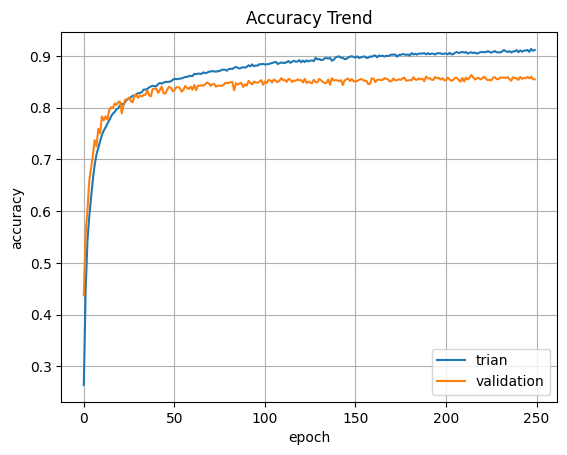

In [59]:
import matplotlib.pyplot as plt
plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['trian','validation'],loc='best')
plt.grid()
plt.show()

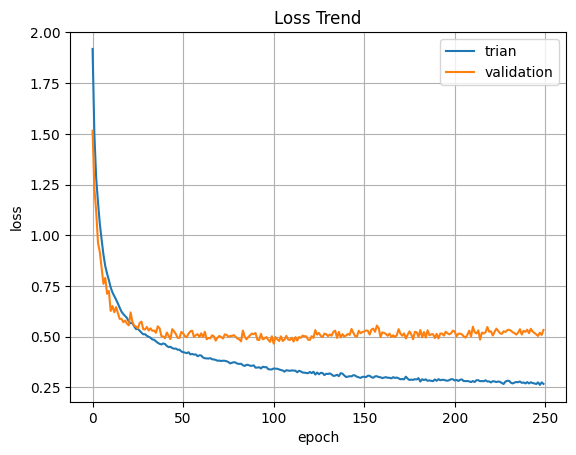

In [60]:
import matplotlib.pyplot as plt
plt.plot(c_history.history['loss'])
plt.plot(c_history.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['trian','validation'],loc='best')
plt.grid()
plt.show()

Model restructure
Augument-Image Data generator
        -Flow
Early stopping
Dropout Epoch


# 파라미터 변경


In [65]:
print('x_train.shape[0]=',x_train.shape[0])

augment_size = x_train.shape[0]
if augment_size >= x_train.shape[0]:
  augment_size = x_train.shape[0] -1
   #데이터 증강 사이즈가 훈련 데이터의 개수와 같거나 크다면, 중복된 이미지가 생성될 수 있다.
print("augment_size = ", augment_size)
randi = np.random.choice(x_train.shape[0],size=augment_size,replace=False)
 #x_train.shape [0] 에서 augment_size 개수만큼의 랜덤한 인덱스를 생성.

x_train.shape[0]= 70000
augment_size =  69999


In [66]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 증강할 이미지 수
augment_size = 10000  # 예: 전체 훈련 세트의 일부

# 무작위로 추출할 인덱스
randi = np.random.randint(x_train.shape[0], size=augment_size)

# 선택한 인덱스 기반 복사본 생성
x_augmented = x_train[randi].copy()
y_augmented = y_train[randi].copy()

# 데이터 증강기 정의
ImgGen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 증강 이미지 생성
gen = ImgGen.flow(x_augmented, y_augmented, batch_size=augment_size, shuffle=False)

# 증강 이미지 1배치 추출
x_augmented, y_augmented = next(gen)

# 원래 학습 데이터와 증강 데이터를 연결
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

# 데이터 섞기
Sort = np.arange(x_train.shape[0])
np.random.shuffle(Sort)

x_train = x_train[Sort]
y_train = y_train[Sort]


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

c_model = Sequential()

# Block 1
c_model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))
c_model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 2
c_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
c_model.add(BatchNormalization())
c_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
c_model.add(BatchNormalization())
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 3
c_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
c_model.add(BatchNormalization())
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 4
c_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
c_model.add(BatchNormalization())
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Block 5
c_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
c_model.add(BatchNormalization())
c_model.add(MaxPooling2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

# Fully Connected
c_model.add(Flatten())
c_model.add(Dense(128, activation='relu'))
c_model.add(Dropout(0.5))
c_model.add(Dense(10, activation='softmax'))
# ======================== 모델 성능 비교 ========================
# [이전 모델 요약]
# - Conv 구조: 대부분 (3x3), 일부 (5x5)
# - BatchNormalization: 미사용
# - Dropout: 0.25 ~ 0.5
# - Data Augmentation: 미사용
# - Epochs: 250
# - Accuracy: 약 84~86%
# - Loss: 약 0.6 ~ 0.7

# [현재 모델 요약]
# - Conv 구조: Block 1은 (5x5), 나머지는 (3x3)
# - BatchNormalization: Block 2~5에 적용
# - Dropout: 0.25 ~ 0.5 유지
# - Data Augmentation: rotation(15), shift(0.1), flip 적용
# - Epochs: 250
# - Accuracy: 88.22%
# - Loss: 0.4743

# [성능 향상 요인]
# 1. BatchNormalization → 학습 안정성 + 수렴 속도 향상
# 2. Data Augmentation → 과적합 완화 및 일반화 성능 증가
# 3. 커널 구성 최적화 → 불필요한 연산 감소, 정보 효율적 추출
# ==============================================================



In [68]:
c_model.compile(loss='sparse_categorical_crossentropy',
optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

c_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 472,362 (1.80 MB)

 Trainable params: 471,338 (1.80 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [69]:
c_history = c_model.fit(x_train, y_train, batch_size=256,
epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 67ms/step - accuracy: 0.1952 - loss: 2.3140 - val_accuracy: 0.1492 - val_loss: 2.7872
Epoch 2/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4156 - loss: 1.5942 - val_accuracy: 0.4977 - val_loss: 1.3424
Epoch 3/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5228 - loss: 1.3452 - val_accuracy: 0.5400 - val_loss: 1.3727
Epoch 4/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5830 - loss: 1.1845 - val_accuracy: 0.5684 - val_loss: 1.2630
Epoch 5/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6271 - loss: 1.0616 - val_accuracy: 0.6316 - val_loss: 1.1510
Epoch 6/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6640 - loss: 0.9716 - val_accuracy: 0.6570 - val_loss: 0.9799
Epoch 7/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6934 - loss: 0.8876 - val_accuracy: 0.7354 - val_loss: 0.7635
Epoch 8/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7177 - loss: 0

In [70]:
c_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8822 - loss: 0.4743


[0.48183920979499817, 0.8798999786376953]